In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file = pd.read_csv('/Users/luisfuentes/Desktop/biotecgen/genotypedAsoCebu.txt', sep='\t', header=1)
# score = file["Score"]
# file.drop(columns=["Score"], inplace=True)
# file.fillna(0, inplace=True)
# score.fillna(0, inplace=True)
file.rename(columns={"markers": "sample"}, inplace=True)
file

,sample,rs478561671,rs134400846,rs41609588,rs524598098,rs137418621,rs108982244,rs441304198,rs43703977,rs110887329,...,rs42206366,rs29022246,rs42369003,rs42370862,rs135823053,rs109260438,rs110848398,rs42857690,rs43538984,rs110677413
0,Bv6748801G,1.0,2.0,2.0,0,2,0.0,1,2.0,0,...,2,0,1.0,0.0,1,0,2,2.0,2.0,2.0
1,Bv6748901G,1.0,2.0,2.0,0,2,0.0,2,1.0,0,...,2,0,1.0,1.0,1,0,0,2.0,2.0,2.0
2,Bv6749001G,1.0,2.0,2.0,1,1,0.0,0,2.0,0,...,2,0,1.0,0.0,1,0,1,2.0,2.0,1.0
3,Bv6749101G,0.0,2.0,2.0,0,2,0.0,0,1.0,0,...,2,0,1.0,1.0,0,0,1,2.0,2.0,2.0
4,Bv6749201G,NaN,2.0,2.0,0,2,0.0,1,0.0,0,...,2,0,1.0,0.0,1,0,1,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,Bv6756701G,0.0,2.0,2.0,0,2,0.0,1,2.0,0,...,2,0,1.0,0.0,1,0,1,2.0,2.0,2.0
80,Bv6756801G,NaN,2.0,2.0,0,2,0.0,0,2.0,0,...,2,0,1.0,1.0,0,0,1,2.0,NaN,2.0
81,Bv6756901G,1.0,2.0,2.0,0,1,0.0,0,2.0,0,...,2,0,0.0,2.0,0,0,0,NaN,2.0,2.0
82,Bv6757001G,NaN,2.0,2.0,0,2,0.0,1,2.0,0,...,2,0,1.0,0.0,0,0,1,2.0,2.0,2.0


In [4]:
print(f'Cantidad de filas y columnas {file.shape}') # Validar las dimensiones del conjunto de datos
print(f'Nombre columnas {file.columns}')
print('Number of instances:', file.shape, 'Number of attributes: ', file.shape[1])
dimensionality = file.shape[1]/file.shape[0]
print('Dimensionality of dataset is:', dimensionality)
print(file.dtypes)

Cantidad de filas y columnas (84, 39201)
Nombre columnas Index(['sample', 'rs478561671', 'rs134400846', 'rs41609588', 'rs524598098',
       'rs137418621', 'rs108982244', 'rs441304198', 'rs43703977',
       'rs110887329',
       ...
       'rs42206366', 'rs29022246', 'rs42369003', 'rs42370862', 'rs135823053',
       'rs109260438', 'rs110848398', 'rs42857690', 'rs43538984',
       'rs110677413'],
      dtype='object', length=39201)
Number of instances: (84, 39201) Number of attributes:  39201
Dimensionality of dataset is: 466.67857142857144
sample          object
rs478561671    float64
rs134400846    float64
rs41609588     float64
rs524598098      int64
                ...   
rs109260438      int64
rs110848398      int64
rs42857690     float64
rs43538984     float64
rs110677413    float64
Length: 39201, dtype: object


In [5]:
file.describe().T

,count,mean,std,min,25%,50%,75%,max
rs478561671,67.0,0.746269,0.438430,0.0,0.50,1.0,1.0,1.0
rs134400846,83.0,2.000000,0.000000,2.0,2.00,2.0,2.0,2.0
rs41609588,82.0,2.000000,0.000000,2.0,2.00,2.0,2.0,2.0
rs524598098,84.0,0.202381,0.404188,0.0,0.00,0.0,0.0,1.0
rs137418621,84.0,1.714286,0.480247,0.0,1.00,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...
rs109260438,84.0,0.095238,0.295307,0.0,0.00,0.0,0.0,1.0
rs110848398,84.0,0.988095,0.702732,0.0,0.75,1.0,1.0,2.0
rs42857690,79.0,1.974684,0.158088,1.0,2.00,2.0,2.0,2.0
rs43538984,72.0,1.916667,0.278325,1.0,2.00,2.0,2.0,2.0


In [5]:
file.skew()

/var/folders/qx/5grd8gwd3pzblwjh964n3hq80000gn/T/ipykernel_8948/78642387.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  file.skew()


rs478561671   -1.157978
rs134400846    0.000000
rs41609588     0.000000
rs524598098    1.508596
rs137418621   -1.296203
                 ...   
rs109260438    2.808161
rs110848398    0.016502
rs42857690    -6.161281
rs43538984    -3.079648
rs110677413   -3.452303
Length: 39200, dtype: float64

In [6]:
# fig = plt.figure(figsize = (20,20))
# ax = fig.gca()
# file.hist(ax=ax)
# plt.show()

In [7]:
# fig = plt.figure(figsize =(16,16))
# ax = fig.gca()
# print(file.plot(ax=ax, kind='box',subplots = True, layout= (5,4), sharex = False))
# plt.show()

In [12]:
corr = file.corr(method='pearson')
# plt.figure(figsize = (10,10))
# ax= sns.heatmap(corr, vmax = 1 , vmin = -1, square = True , annot = True)
# plt.title("Matriz de Correlación entre variables")
# plt.show()


/var/folders/qx/5grd8gwd3pzblwjh964n3hq80000gn/T/ipykernel_9638/3014277608.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = file.corr(method='pearson')


In [13]:
corr

,rs478561671,rs134400846,rs41609588,rs524598098,rs137418621,rs108982244,rs441304198,rs43703977,rs110887329,rs209115773,...,rs42206366,rs29022246,rs42369003,rs42370862,rs135823053,rs109260438,rs110848398,rs42857690,rs43538984,rs110677413
rs478561671,1.000000,NaN,NaN,0.024706,-0.124624,NaN,0.036193,-0.028606,NaN,-0.181103,...,NaN,0.035066,0.243066,0.209500,0.141135,-0.025105,-0.155952,0.100947,-0.026671,-0.185425
rs134400846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rs41609588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rs524598098,0.024706,NaN,NaN,1.000000,-0.691625,NaN,-0.232211,0.051503,NaN,0.138762,...,NaN,-0.151877,0.032723,-0.079196,-0.154036,-0.062487,-0.203505,0.078023,0.030934,0.043011
rs137418621,-0.124624,NaN,NaN,-0.691625,1.000000,NaN,0.346100,-0.158374,NaN,0.010381,...,NaN,0.180456,-0.019488,0.034484,0.095004,0.109227,0.096900,-0.094357,-0.175250,-0.095569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rs109260438,-0.025105,NaN,NaN,-0.062487,0.109227,NaN,-0.128812,0.084402,NaN,0.211027,...,NaN,0.342381,-0.146600,0.296916,0.083688,1.000000,0.005529,-0.233312,-0.272727,0.100955
rs110848398,-0.155952,NaN,NaN,-0.203505,0.096900,NaN,-0.098258,0.032707,NaN,0.296189,...,NaN,-0.056523,0.093894,-0.517095,-0.238737,0.005529,1.000000,-0.111803,-0.030181,-0.077474
rs42857690,0.100947,NaN,NaN,0.078023,-0.094357,NaN,0.009210,-0.117046,NaN,-0.251538,...,NaN,-0.233312,0.198073,-0.092632,-0.101704,-0.233312,-0.111803,1.000000,NaN,-0.035493
rs43538984,-0.026671,NaN,NaN,0.030934,-0.175250,NaN,-0.216541,0.089398,NaN,0.091578,...,NaN,-0.454545,0.062500,-0.055123,-0.042220,-0.272727,-0.030181,NaN,1.000000,-0.090303


In [14]:
columnsCleand = []
for i in corr.columns:
    if(corr[i].isna().sum() > 31360):
        columnsCleand.append(i) 


In [9]:
len(columnsCleand)

31268

In [10]:
corr.dropna(subset=columnsCleand, inplace=True)

In [11]:
print(corr)

             rs478561671  rs134400846  rs41609588  rs524598098  rs137418621  \
rs524598098     0.024706          NaN         NaN     1.000000    -0.691625   
rs137418621    -0.124624          NaN         NaN    -0.691625     1.000000   
rs441304198     0.036193          NaN         NaN    -0.232211     0.346100   
rs209115773    -0.181103          NaN         NaN     0.138762     0.010381   
rs110936909     0.166763          NaN         NaN    -0.122898    -0.271799   
...                  ...          ...         ...          ...          ...   
rs109661590    -0.145480          NaN         NaN    -0.008867    -0.097015   
rs110184133    -0.075357          NaN         NaN    -0.034823    -0.068810   
rs29022246      0.035066          NaN         NaN    -0.151877     0.180456   
rs135823053     0.141135          NaN         NaN    -0.154036     0.095004   
rs110848398    -0.155952          NaN         NaN    -0.203505     0.096900   

             rs108982244  rs441304198  rs43703977  

In [41]:
# PCA

In [56]:
file.fillna(3, inplace=True)
X = file.iloc[:, 1:].values
Y = file.iloc[:, 0].values

In [57]:
X


array([[1., 2., 2., ..., 2., 2., 2.],
       [1., 2., 2., ..., 2., 2., 2.],
       [1., 2., 2., ..., 2., 2., 1.],
       ...,
       [1., 2., 2., ..., 3., 2., 2.],
       [3., 2., 2., ..., 2., 2., 2.],
       [1., 2., 2., ..., 2., 2., 3.]])

In [58]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_scaled

array([[-0.20538652, -0.10976426, -0.15617376, ..., -0.12467575,
        -0.15617376, -0.07161149],
       [-0.20538652, -0.10976426, -0.15617376, ..., -0.12467575,
        -0.15617376, -0.07161149],
       [-0.20538652, -0.10976426, -0.15617376, ..., -0.12467575,
        -0.15617376, -2.07673313],
       ...,
       [-0.20538652, -0.10976426, -0.15617376, ...,  3.36624512,
        -0.15617376, -0.07161149],
       [ 1.82431556, -0.10976426, -0.15617376, ..., -0.12467575,
        -0.15617376, -0.07161149],
       [-0.20538652, -0.10976426, -0.15617376, ..., -0.12467575,
        -0.15617376,  1.93351016]])

In [65]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
X_pca = pca.fit_transform(X)


In [79]:
X_pca.explained_variance_ratio_

AttributeError: 'numpy.ndarray' object has no attribute 'explained_variance_ratio_'

In [70]:
labels = {str(i): f"PC {i+1}" for i in range(5)}
fig = px.scatter_matrix(
    X_pca,
    dimensions=range(5),
    color=Y,
    labels=labels,
)

fig.update_traces(diagonal_visible=False)
fig.show()

In [16]:
## Kmeans clustering

In [71]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [72]:
#elbow method

kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 1000,
    "random_state": 42,
}

sse = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

2

In [73]:
# BIC method    
from sklearn.mixture import GaussianMixture
n_components = range(1, 11)

gm = [GaussianMixture(n, covariance_type='diag', random_state=0).fit(X) for n in n_components]

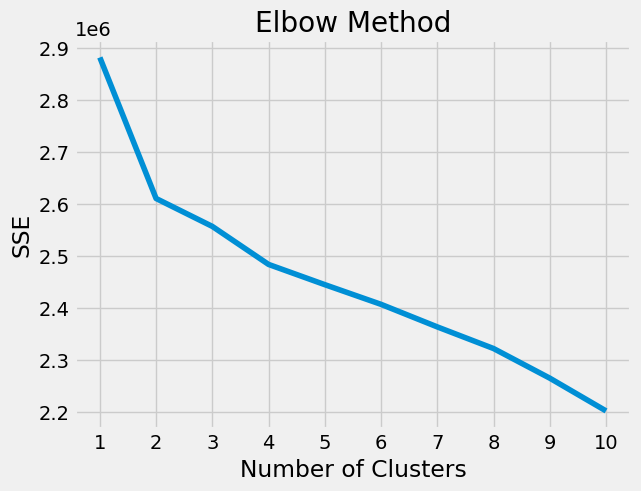

In [74]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.title("Elbow Method")
plt.show()

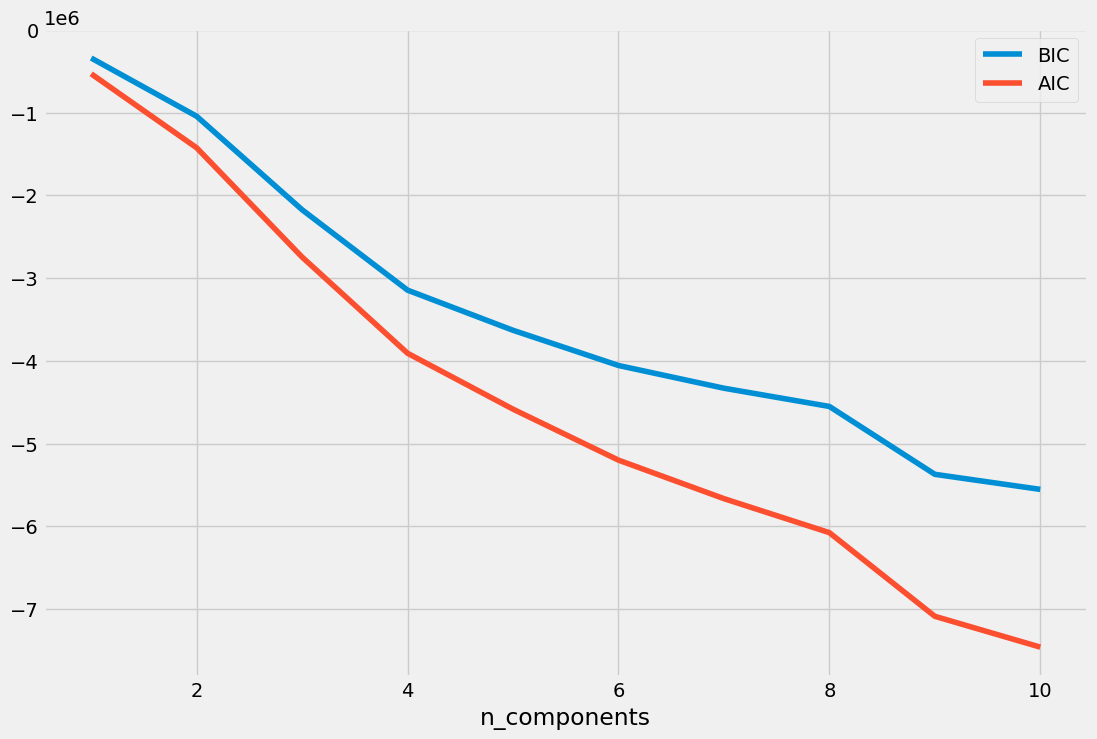

In [75]:
plt.figure(figsize=(12, 8))
plt.plot(n_components, [m.bic(X) for m in gm], label='BIC')
plt.plot(n_components, [m.aic(X) for m in gm], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.show()

In [80]:
kmeans = KMeans(
    init="random",
    n_clusters=4,
    n_init=10,
    max_iter=1000,
    random_state=42
)

In [81]:
kmeans.fit(X_pca)
y_kmeans = kmeans.fit_predict(X_pca)
y_kmeansU = np.unique(y_kmeans)
y_kmeansU

array([0, 1, 2, 3], dtype=int32)

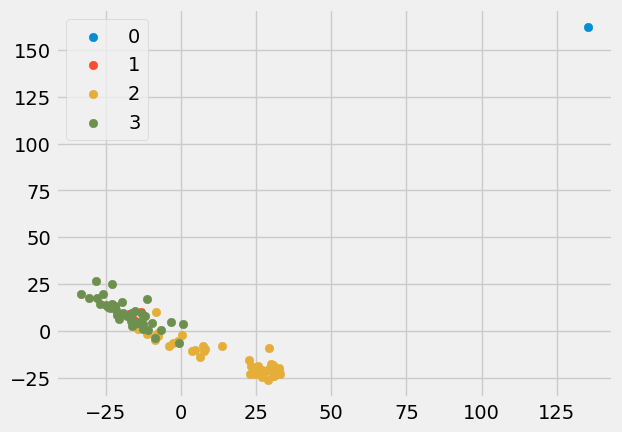

In [82]:
for i in y_kmeansU:
    plt.scatter(X_pca[y_kmeans == i, 0], X_pca[y_kmeans == i, 1], label=i)
plt.legend()
plt.show()

In [25]:
# multivariate analysis

In [54]:
file.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Columns: 39201 entries, sample to rs110677413
dtypes: float64(18746), int64(20454), object(1)
memory usage: 25.1+ MB


In [27]:
import pandas as pd2

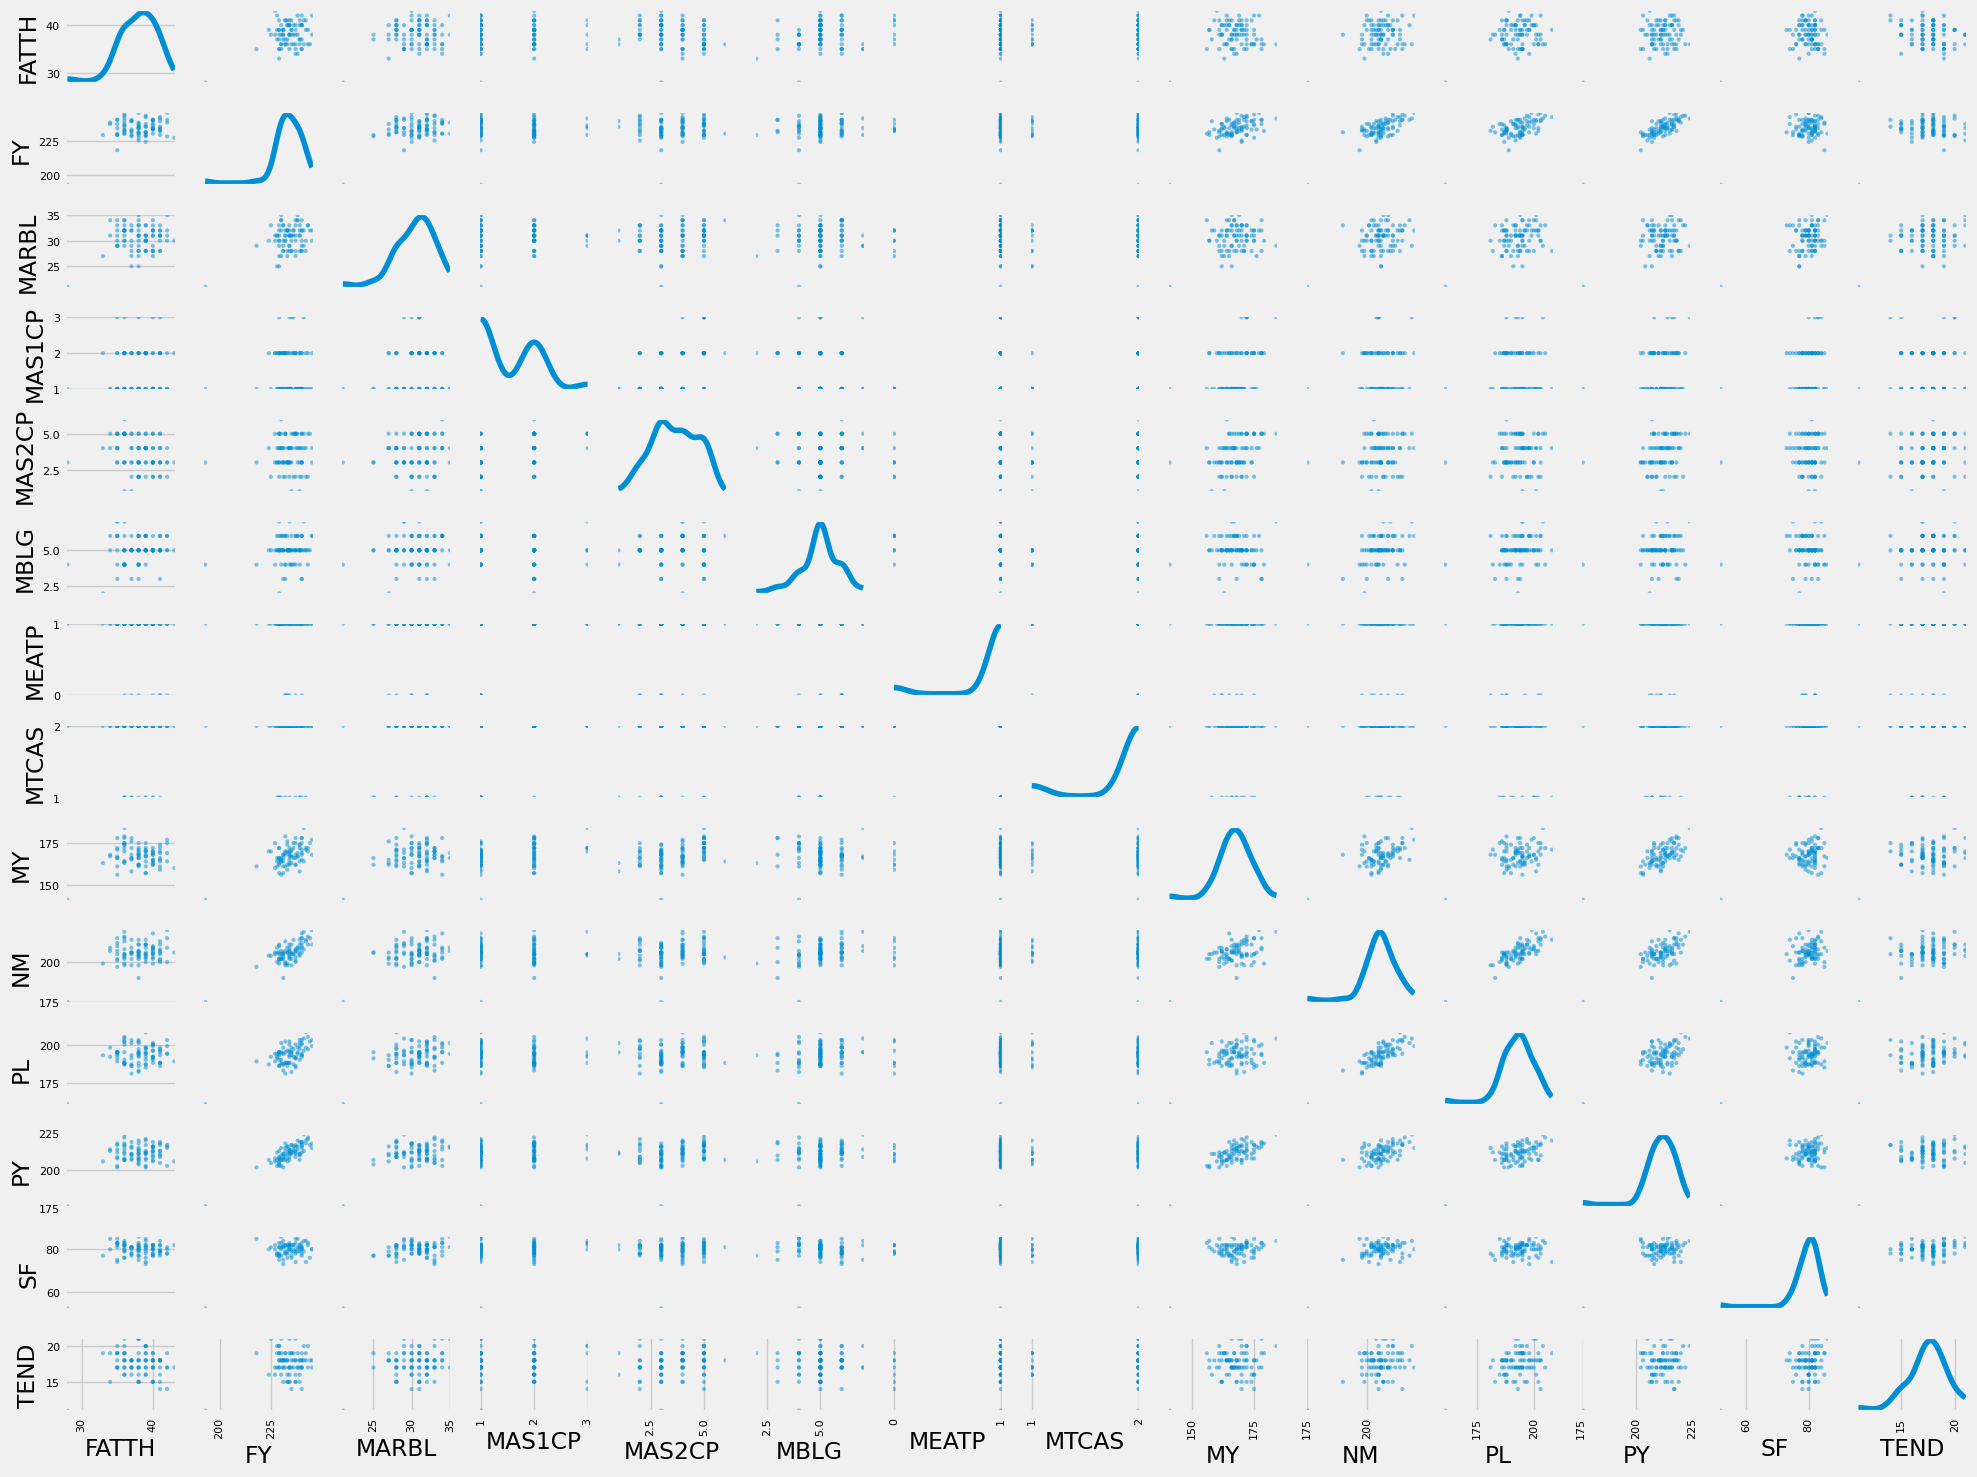

In [69]:
pd2.plotting.scatter_matrix(file.loc[:,"FATTH":"TEND"], diagonal='kde', figsize=(20,15))
plt.tight_layout()
plt.show()

In [29]:
for i in file.columns[1:]:
    sns.lmplot(x="Sample", y=file.columns[i], data=file, hue="Sample", fit_reg=False)


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [57]:
file.describe().T

,count,mean,std,min,25%,50%,75%,max
FATTH,84.0,38.059524,2.490228,28.0,36.00,38.0,40.00,43.0
FY,84.0,233.845238,6.860914,193.0,230.00,234.0,238.25,245.0
MARBL,84.0,30.547619,2.441631,21.0,29.00,31.0,32.00,35.0
MAS1CP,84.0,1.500000,0.611142,1.0,1.00,1.0,2.00,3.0
MAS2CP,84.0,3.619048,1.107529,1.0,3.00,4.0,5.00,6.0
MBLG,84.0,5.000000,0.905139,2.0,5.00,5.0,5.25,7.0
MEATP,84.0,0.916667,0.278045,0.0,1.00,1.0,1.00,1.0
MTCAS,84.0,1.869048,0.339374,1.0,2.00,2.0,2.00,2.0
MY,84.0,167.595238,6.313342,141.0,164.00,168.0,172.00,184.0
NM,84.0,206.011905,6.401231,175.0,202.75,206.0,209.25,220.0


In [58]:
X2 = file.iloc[:, 1:15].values
y2 = file.iloc[:, 0].values


In [59]:
from sklearn.preprocessing import LabelEncoder
X2= sc.fit_transform(X2)
le = LabelEncoder()
y2 = le.fit_transform(y2)



In [60]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=0)

In [61]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)

In [62]:
print(X2_train.shape)
print(y2_train.shape)
print(X2_test.shape)
print(y2_test.shape)

(67, 14)
(67,)
(17, 14)
(17,)


In [65]:
X2_train = lda.fit(X2_train, y2_train)

ValueError: The number of samples must be more than the number of classes.